<a href="https://colab.research.google.com/github/diegormsouza/spaceweek2023/blob/main/MTG_LI_EUMDAC_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Accessing and Processing MTG LI Data**
**Author:** Diego Souza ([github.com/diegormsouza](https://github.com/diegormsouza))

**Version:** July 22 2024

**Reference:** https://user.eumetsat.int/resources/user-guides/mtg-data-access-guide


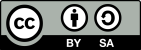

# **Step 1: Checking the Virtual Machine Configuration**

In [1]:
# verifying the installed O.S.
!cat /etc/issue
!uname -a
print('\n')

# verifying the available RAM
!grep MemTotal /proc/meminfo
print('\n')

# verifying the available HD space
!df -h
print('\n')

# verifying the default Python installation directory
!which python
print('\n')

# verifying the Python version
!python --version

Ubuntu 22.04.3 LTS \n \l

Linux 139fbd4d61cf 6.1.85+ #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024 x86_64 x86_64 x86_64 GNU/Linux


MemTotal:       13290460 kB


Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   42G   67G  39% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G   40K  6.4G   1% /var/colab
/dev/sda1        70G   46G   25G  66% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


/usr/local/bin/python


Python 3.10.12


# **Step 2: Installing the Required Libraries**

In [2]:
# install condacolab and the required libraries
!pip install -q condacolab
import condacolab
condacolab.install()
!conda config --add channels conda-forge
!conda config --set channel_priority strict
!mamba install -c conda-forge "numpy<2.0" satpy netcdf4 cartopy pyproj pyspectral hdf5plugin
!pip install eumdac

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:18
🔁 Restarting kernel...

Looking for: ["numpy[version='<2.0']", 'satpy', 'netcdf4', 'cartopy', 'pyproj', 'pyspectral', 'hdf5plugin']

[+] 0.0s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64   1%
conda-forge/noarch    ⣾  [+] 0.3s
conda-forge/linux-64   9%
conda-forge/noarch     3%[+] 0.4s
conda-forge/linux-64  14%
conda-forge/noarch    22%[+] 0.5s
conda-forge/linux-64  18%
conda-forge/noarch    31%[+] 0.6s
conda-forge/linux-64  27%
conda-forge/noarch    42%[+] 0.7s
conda-forge/linux-64  32%
conda-forge/noarch    52%[+] 0.8s
conda-forge/linux-64  32%
conda-forge/noarch    63%[+] 0.9s
conda-forge/linux-64  36%
conda-forge/noarch    73%[+] 1.0s
conda-forge/linux-64  41%
conda-forge/noarch  

# **Step 3: Downloading Ancillary Data**

In [4]:
# download a shapefile with states and provinces of the world
!wget -c https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip
print('\n')

# unzip the shapefile
!unzip -o ne_10m_admin_1_states_provinces.zip
print('\n')

# download a shapefile with the Brazilian states
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/Brasil/BR/BR_UF_2022.zip
print('\n')

# unzip the shapefile
!unzip -o BR_UF_2022.zip
print('\n')

# download the EUMETSAT logo
!wget -c https://raw.githubusercontent.com/diegormsouza/spaceweek2023/main/ancillary/eumetsat_logo.png

--2024-07-22 13:09:06--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip
Resolving www.naturalearthdata.com (www.naturalearthdata.com)... 50.87.253.14
Connecting to www.naturalearthdata.com (www.naturalearthdata.com)|50.87.253.14|:443... connected.
HTTP request sent, awaiting response... 500 Internal Server Error
2024-07-22 13:09:06 ERROR 500: Internal Server Error.



unzip:  cannot find or open ne_10m_admin_1_states_provinces.zip, ne_10m_admin_1_states_provinces.zip.zip or ne_10m_admin_1_states_provinces.zip.ZIP.


--2024-07-22 13:09:06--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/Brasil/BR/BR_UF_2022.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13717460 (13M) [application/zip]
Sav

# **Step 4: EUMDAC User Credentials (EUMETSAT Data Services Client)**

In [4]:
import eumdac                                                   # simple access to the EUMETSAT data of all satellite missions
#==================================================================================================================#
# EUMDAC CREDENTIALS
#==================================================================================================================#

# EUMDAC (EUMETSAT Data Services Client) Access Token
# insert your personal key and secret into the single quotes below.
# first, create an account at this link: https://eoportal.eumetsat.int/
# and get the consumer key and secret at this link: https://api.eumetsat.int/api-key/
consumer_key = 'INSERT_YOUR_CONSUMER_KEY'
consumer_secret = 'INSERT_YOUR_CONSUMER_SECRET'

# verifying whether the creation of the Access Token was successful.
credentials = (consumer_key, consumer_secret)
token = eumdac.AccessToken(credentials)
try:
    print(f"This token '{token}' expires {token.expiration}")
except requests.exceptions.HTTPError as error:
    print(f"Error when tryng the request to the server: '{error}'")

This token '238d8b6b-704b-3524-bcc8-bc974796d57c' expires 2024-07-23 12:34:23.570761


# **Step 5: Data Download**

In [5]:
from datetime import timedelta, date, datetime  # basic date and time types
import os                                       # miscellaneous operating system interfaces
import shutil                                   # high-level file operations
import zipfile                                  # tools to create, read, write, append, and list a ZIP file

#==================================================================================================================#
# DATA DOWNLOAD
#==================================================================================================================#

# download date
download_date = '2024-07-14 15:00'

# convet date strings to ints
year = int(download_date[0:4]); month = int(download_date[5:7]); day = int(download_date[8:10]); hour = int(download_date[11:13]); minute = int(download_date[14:16])

# insert your personal key and secret into the single quotes
# first, create an account at this link: https://eoportal.eumetsat.int/
# and get the consumer key and secret at this link: https://api.eumetsat.int/api-key/
consumer_key = consumer_key
consumer_secret = consumer_secret
# verifying whether the creation of the Access Token was successful.
credentials = (consumer_key, consumer_secret)
token = eumdac.AccessToken(credentials)
try:
    print('Checking the EUMDAC Access Token...')
    print(f'This Token {token} expires {token.expiration}\n')
except requests.exceptions.HTTPError as error:
    print(f'Unexpected error: {error}\n')

# data store and selected collection
datastore = eumdac.DataStore(token)

collections = ['EO:EUM:DAT:0687', 'EO:EUM:DAT:0686']

for collection in collections:
  selected_collection = datastore.get_collection(collection)

  # download time and date
  start = datetime(year, month, day, hour, minute)
  end = datetime(year, month, day, hour, minute+1)
  products = selected_collection.search(dtstart=start, dtend=end)

  # download directory
  dir='/content/sample_data/'; os.makedirs(dir, exist_ok=True)
  path_to_testdata = dir

  # check if file exists. if not, download and unzip the file
  for product in products:
    print(f'Checking if the file already exists: {dir}{str(product)}.zip')
    if os.path.exists(dir+str(product)+'.zip'):
        print('This file already exists.\n')
    else:
        print('This file doesn\'t exist.\n')
        with product.open() as fsrc, open(dir+fsrc.name, mode='wb') as fdst:
            print(f'Downloading the following file: {dir+fsrc.name}')
            shutil.copyfileobj(fsrc, fdst)
            print(f'Download finished.\n')
            # unzip the downloaded file
        with zipfile.ZipFile(f'{dir}{str(product)}.zip', 'r') as zip_ref:
            zip_ref.extractall(dir)
            print('The file has been uncompressed.\n')

Checking the EUMDAC Access Token...
This Token 238d8b6b-704b-3524-bcc8-bc974796d57c expires 2024-07-23 12:34:23.788830

Checking if the file already exists: /content/sample_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+LI-2-AFA--FD--x-x--ARC-x_C_EUMT_20240714151037_L2PF_OPE_20240714150000_20240714151000_N__T_0091_0000.zip
This file already exists.

Checking if the file already exists: /content/sample_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+LI-2-AFA--FD--x-x--ARC-x_C_EUMT_20240714150038_L2PF_OPE_20240714145000_20240714150000_N__T_0090_0000.zip
This file already exists.

Checking if the file already exists: /content/sample_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+LI-2-AF--FD--CHK-x--ARC-NC4E_C_EUMT_20240714151037_L2PF_OPE_20240714150000_20240714151000_N__T_0091_0000.zip
This file doesn't exist.

Download finished.

The file has been uncompressed.

Checking if the file already exists: /content/sample_data/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+LI-2-AF--FD--CHK-x--ARC-NC4E_C_EUMT_202407141500

# **Exemple: Processing LI (Lightning Imager) Data**

**Importing some libraries:**

In [1]:
# required modules
import matplotlib.pyplot as plt                 # plotting library
import hdf5plugin                               # for reading compressed data, a decompression library is needed
import glob                                     # unix style pathname pattern expansion
import os                                       # miscellaneous operating system interfaces
import numpy as np                              # import the Numpy package
import cartopy, cartopy.crs as ccrs             # produce maps and other geospatial data analyses
import cartopy.feature as cfeature              # common drawing and filtering operations
import cartopy.io.shapereader as shpreader      # import shapefiles
import pyproj                                   # python interface to PROJ (cartographic projections and coordinate transformations library)
from pyresample import geometry                 # classes for describing different geographic areas using a mesh of points or pixels
from satpy import Scene                         # scene object to hold satellite data
from satpy import available_readers             # available readers from satpy
from satpy.writers import get_enhanced_image    # get an enhanced version of dataset as an XRImage instance

/usr/local/lib/python3.10/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


**Basic plot:**

In [2]:
# initialise Scene
path_to_testdata = '/content/sample_data/'
scn = Scene(filenames=glob.glob(os.path.join(path_to_testdata, '*BODY*.nc')), reader='li_l2_nc', reader_kwargs={'with_area_definition': True})

# load the datasets/composites of interest.
scn.load(['flash_accumulation'], upper_right_corner='NE')
scn.show('flash_accumulation')

In [2]:
# initialise Scene
path_to_testdata = '/content/sample_data/'
scn = Scene(filenames=glob.glob(os.path.join(path_to_testdata, '*BODY*.nc')), reader='li_l2_nc', reader_kwargs={'with_area_definition': True})

# load the datasets/composites of interest.
scn.load(['accumulated_flash_area'], upper_right_corner='NE')
scn.show('accumulated_flash_area')

**Cheking the available datasets on an LI "scene":**

In [3]:
# check the available datasets
scn.available_dataset_names()

['accumulated_flash_area',
 'accumulation_offsets',
 'accumulation_start_times',
 'average_flash_qa',
 'flash_accumulation',
 'l1b_geolocation_warning',
 'l1b_radiometric_warning',
 'latitude',
 'longitude',
 'mtg_geos_projection',
 'x',
 'y']

**Checking the available composites:**

In [4]:
# check the available composites
scn.available_composite_names()

['flash_area']

**Processing the "flash accumulation" dataset:**

/usr/local/lib/python3.10/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()
/usr/local/lib/python3.10/site-packages/pyresample/resampler.py:145: UserWarning: Upgrade 'pyresample' for a more accurate default 'radius_of_influence'.
  cache_id = self.precompute(cache_dir=cache_dir, **kwargs)
/usr/local/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))


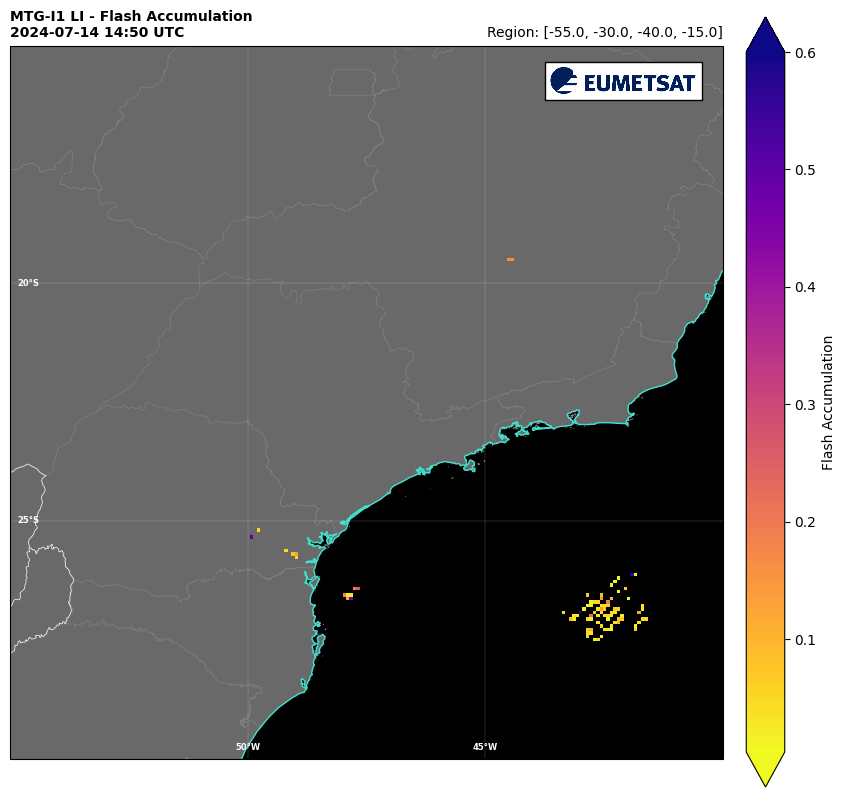

In [1]:
#-------------------------------------------------------------------------------------------------------------------
# Training - Processing EUMETSAT Data and Products - Example: Lightning Imager (LI) Data - Flash Accumulation
# Author: Diego Souza (INPE/CGCT/DISSM)
#-------------------------------------------------------------------------------------------------------------------

#==================================================================================================================#
# REQUIRED MODULES
#==================================================================================================================#

import matplotlib.pyplot as plt                 # plotting library
import hdf5plugin                               # for reading compressed data, a decompression library is needed
import glob                                     # unix style pathname pattern expansion
import os                                       # miscellaneous operating system interfaces
import numpy as np                              # import the Numpy package
import cartopy, cartopy.crs as ccrs             # produce maps and other geospatial data analyses
import cartopy.feature as cfeature              # common drawing and filtering operations
import cartopy.io.shapereader as shpreader      # import shapefiles
import pyproj                                   # python interface to PROJ (cartographic projections and coordinate transformations library)
from pyresample import geometry                 # classes for describing different geographic areas using a mesh of points or pixels
from matplotlib.offsetbox import OffsetImage    # change the image size (zoom)
from matplotlib.offsetbox import AnnotationBbox # creates an annotation using an OffsetBox
from satpy import Scene                         # scene object to hold satellite data
from satpy.writers import get_enhanced_image    # get an enhanced version of dataset as an XRImage instance

#==================================================================================================================#
# CREATE A CUSTOM AREA
#==================================================================================================================#

# image extent (min lon, min lat, max lon, max lat)
extent = [-55.00, -30.00, -40.00, -15.00] # São Paulo

# pyproj definitions
P = pyproj.Proj(proj='eqc', ellps='WGS84', preserve_units=True)
G = pyproj.Geod(ellps='WGS84')
x1,y1 = P(extent[1],extent[0])
x2,y2 = P(extent[3],extent[2])

# define km per degree
km_per_degree = 111.32

# calculate the total number of degrees in lat and lon extent
deg_lon = extent[2] - extent[0]
deg_lat = extent[3] - extent[1]

# calculate the number of pixels (width and height)
resolution = 8.0
width = (km_per_degree * deg_lon) /  resolution
height = (km_per_degree * deg_lat) /  resolution

# creating an area definition on the fly
area_id = 'my_area'
description = 'custom area'
proj_id = 'my_area'
x_size = int(width)
y_size = int(height)
area_extent = (y1,x1,y2,x2)
proj_dict = {'a': 6378169.0, 'b': 6378169.0,'units': 'm', 'lon_0': 0.0,'proj': 'eqc', 'lat_0': 0.0}
area_def = geometry.AreaDefinition(area_id, description, proj_id, proj_dict, x_size, y_size, area_extent)

#==================================================================================================================#
# DATA READING AND MANIPULATION
#==================================================================================================================#

# initialise Scene
path_to_testdata = '/content/sample_data/'
scn = Scene(filenames=glob.glob(os.path.join(path_to_testdata, '*BODY*.nc')), reader='li_l2_nc', reader_kwargs={'with_area_definition': True})

# load the datasets/composites of interest.
scn.load(["flash_accumulation"], upper_right_corner='NE')

# resample the scene to a specified area
scn_resampled = scn.resample(area_def)

#==================================================================================================================#
# PLOT THE IMAGE
#==================================================================================================================#

# plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# define the projection and add coastlines and gridlnes
ax = plt.axes(projection=ccrs.PlateCarree())

# define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# show the image
plt.imshow(scn_resampled["flash_accumulation"], extent=img_extent, origin='upper', cmap='plasma_r')

# add some map elements to the plot
ax.add_feature(cfeature.LAND, facecolor='dimgray')
ax.add_feature(cfeature.OCEAN, facecolor='black')

# add a shapefile
shapefile = list(shpreader.Reader('BR_UF_2022.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray',facecolor='none', linewidth=0.3)

# add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='turquoise', linewidth=1.0)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='white', alpha=1.0, linestyle='--', linewidth=0.15,
                  xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xpadding = -5
gl.ypadding = -5
gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

# add a logo to the plot
my_logo = plt.imread('eumetsat_logo.png')
imagebox = OffsetImage(my_logo, zoom = 0.2)
ab = AnnotationBbox(imagebox, (0.86, 0.95), xycoords="axes fraction", frameon = True)
ax.add_artist(ab)

# add a colorbar
cbar = plt.colorbar(label='Flash Accumulation', extend='both', orientation='vertical', pad=0.03, fraction=0.05)

# read the time and date
date = scn_resampled["flash_accumulation"].attrs['start_time']
date = date.strftime('%Y-%m-%d %H:%M UTC')

# add a title
plt.title(f'MTG-I1 LI - Flash Accumulation\n{date}' , fontweight='bold', fontsize=10, loc='left')
plt.title('Region: ' + str(extent) , fontsize=10, loc='right')

#==================================================================================================================#
# SHOW THE PLOT
#==================================================================================================================#

# show the image
plt.show()

**Processing the "flash area" composite:**

/usr/local/lib/python3.10/site-packages/pyresample/resampler.py:145: UserWarning: Upgrade 'pyresample' for a more accurate default 'radius_of_influence'.
  cache_id = self.precompute(cache_dir=cache_dir, **kwargs)
/usr/local/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)
/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


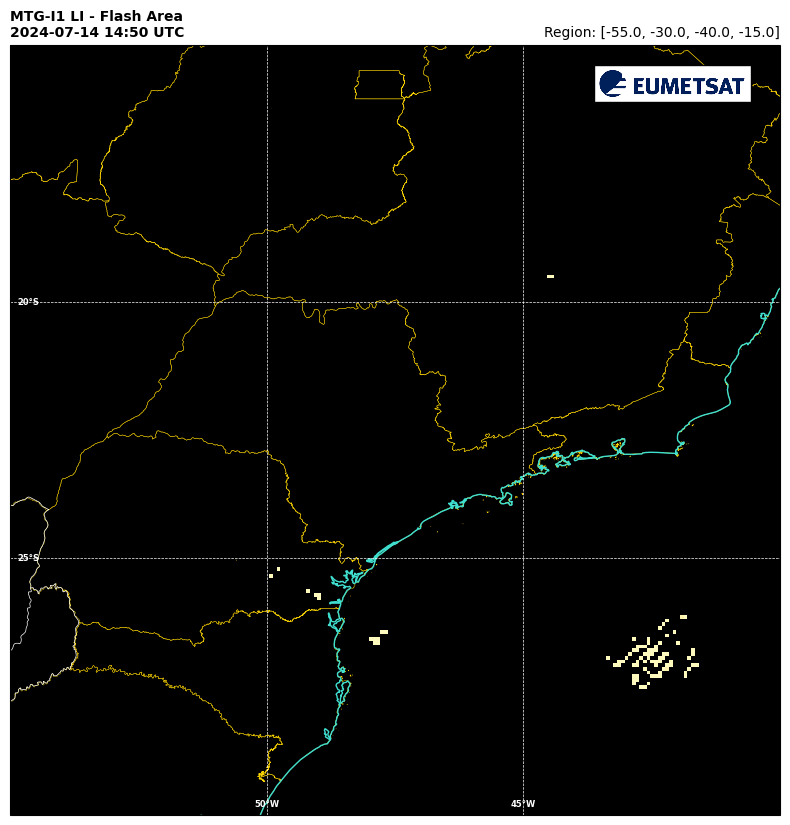

In [2]:
#-------------------------------------------------------------------------------------------------------------------
# Training - Processing EUMETSAT Data and Products - Example: Lightning Imager (LI) Data - Flash Area
# Author: Diego Souza (INPE/CGCT/DISSM)
#-------------------------------------------------------------------------------------------------------------------
#==================================================================================================================#
# REQUIRED MODULES
#==================================================================================================================#

import matplotlib.pyplot as plt                 # plotting library
import hdf5plugin                               # for reading compressed data, a decompression library is needed
import glob                                     # unix style pathname pattern expansion
import os                                       # miscellaneous operating system interfaces
import numpy as np                              # import the Numpy package
import cartopy, cartopy.crs as ccrs             # produce maps and other geospatial data analyses
import cartopy.feature as cfeature              # common drawing and filtering operations
import cartopy.io.shapereader as shpreader      # import shapefiles
import pyproj                                   # python interface to PROJ (cartographic projections and coordinate transformations library)
from pyresample import geometry                 # classes for describing different geographic areas using a mesh of points or pixels
from matplotlib.offsetbox import OffsetImage    # change the image size (zoom)
from matplotlib.offsetbox import AnnotationBbox # creates an annotation using an OffsetBox
from satpy import Scene                         # scene object to hold satellite data
from satpy.writers import get_enhanced_image    # get an enhanced version of dataset as an XRImage instance

#==================================================================================================================#
# CREATE A CUSTOM AREA
#==================================================================================================================#

# image extent (min lon, min lat, max lon, max lat)
extent = [-55.00, -30.00, -40.00, -15.00] # São Paulo

# pyproj definitions
P = pyproj.Proj(proj='eqc', ellps='WGS84', preserve_units=True)
G = pyproj.Geod(ellps='WGS84')
x1,y1 = P(extent[1],extent[0])
x2,y2 = P(extent[3],extent[2])

# define km per degree
km_per_degree = 111.32

# calculate the total number of degrees in lat and lon extent
deg_lon = extent[2] - extent[0]
deg_lat = extent[3] - extent[1]

# calculate the number of pixels (width and height)
resolution = 8.0
width = (km_per_degree * deg_lon) /  resolution
height = (km_per_degree * deg_lat) /  resolution

# creating an area definition on the fly
area_id = 'my_area'
description = 'custom area'
proj_id = 'my_area'
x_size = int(width)
y_size = int(height)
area_extent = (y1,x1,y2,x2)
proj_dict = {'a': 6378169.0, 'b': 6378169.0,'units': 'm', 'lon_0': 0.0,'proj': 'eqc', 'lat_0': 0.0}
area_def = geometry.AreaDefinition(area_id, description, proj_id, proj_dict, x_size, y_size, area_extent)

#==================================================================================================================#
# DATA READING AND MANIPULATION
#==================================================================================================================#

# initialise Scene
path_to_testdata = '/content/sample_data/'
scn = Scene(filenames=glob.glob(os.path.join(path_to_testdata, '*BODY*.nc')), reader='li_l2_nc', reader_kwargs={'with_area_definition': True})

# load the datasets/composites of interest.
scn.load(["flash_area"], upper_right_corner='NE')

# resample the scene to a specified area
scn_resampled = scn.resample(area_def)

#==================================================================================================================#
# PLOT THE IMAGE
#==================================================================================================================#

# plot size (width x height, in inches)
plt.figure(figsize=(10,10))

# define the projection and add coastlines and gridlnes
ax = plt.axes(projection=ccrs.PlateCarree())

# define the image extent
img_extent = [extent[0], extent[2], extent[1], extent[3]]

# add some map elements to the plot
ax.add_feature(cfeature.LAND, facecolor='dimgray')
ax.add_feature(cfeature.OCEAN, facecolor='black')

# add a shapefile
shapefile = list(shpreader.Reader('BR_UF_2022.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gold',facecolor='none', linewidth=0.3)

# add coastlines, borders and gridlines
ax.coastlines(resolution='10m', color='turquoise', linewidth=1.0)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='white', alpha=1.0, linestyle='--', linewidth=0.5, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xpadding = -5
gl.ypadding = -5
gl.ylabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}
gl.xlabel_style = {'color': 'white', 'size': 6, 'weight': 'bold'}

# add a logo to the plot
my_logo = plt.imread('eumetsat_logo.png')
imagebox = OffsetImage(my_logo, zoom = 0.2)
ab = AnnotationBbox(imagebox, (0.86, 0.95), xycoords="axes fraction", frameon = True, zorder=6)
ax.add_artist(ab)

# read the time and date
date = scn_resampled["flash_area"].attrs['start_time']
date = date.strftime('%Y-%m-%d %H:%M UTC')

# add a title
plt.title(f'MTG-I1 LI - Flash Area\n{date}' , fontweight='bold', fontsize=10, loc='left')
plt.title('Region: ' + str(extent) , fontsize=10, loc='right')

#==================================================================================================================#
# SHOW THE PLOT
#==================================================================================================================#

# show the image
from satpy.writers import get_enhanced_image
rgb = np.moveaxis(get_enhanced_image(scn_resampled["flash_area"]).data.values, 0, -1)
im = plt.imshow(rgb, extent=img_extent, origin='upper', interpolation='none')
plt.show()